<img src="https://tradingcomdados.com/images/logotipo/logotipo-trading-com-dados.svg" width="300" align="left"/>

------
# **CDI vs IBOV vs Ações**
------

# 1. Bibliotecas

In [1]:
%pip install nasdaq-data-link

  Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB)
     ---------------------------------------- 54.2/54.2 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: charset-normalizer~=2.0.0 in c:\users\jamir\appdata\local\programs\python\python310\lib\site-packages (from requests>=2.7.0->nasdaq-data-link) (2.0.12)




[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Análise e manipulação de dados
import numpy as np
import pandas as pd

# Dados séries temporais
from datetime import datetime, timedelta
import pytz

# Fonte de dados
from tvDatafeed import TvDatafeed, Interval
import nasdaqdatalink
import yfinance as yf


# Bibliotecas gráficas
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 2. Obtenção e organização dos dados

In [41]:
91/90

1.011111111111111

In [37]:
data_inicio = '2000-01-01'

In [40]:
selic = nasdaqdatalink.get('BCB/432', start_date = data_inicio, collapse='monthly')
selic

,Value
Date,
2000-01-31,19.00
2000-02-29,19.00
2000-03-31,18.50
2000-04-30,18.50
2000-05-31,18.50
...,...
2023-01-31,13.75
2023-02-28,13.75
2023-03-31,13.75


In [ ]:
(((1+selic/100)**(1/12)-1)*100)

In [31]:
selic_mensal = (((1+selic/100)**(1/12)-1)*100)
selic_mensal['Retorno'] = 1+ selic_mensal/100
selic_mensal['Ano_mes'] = selic_mensal.index.strftime('%Y-%m')
selic_mensal.columns = ['Selic_mensal_%', 'Retorno', 'Ano_mes']
selic_mensal

,CDI_mensal_%,Retorno,Ano_mes
Date,,,
2000-01-31,1.460169,1.014602,2000-01
2000-02-29,1.460169,1.014602,2000-02
2000-03-31,1.424575,1.014246,2000-03
2000-04-30,1.424575,1.014246,2000-04
2000-05-31,1.424575,1.014246,2000-05
...,...,...,...
2023-01-31,1.079391,1.010794,2023-01
2023-02-28,1.079391,1.010794,2023-02
2023-03-31,1.079391,1.010794,2023-03


<AxesSubplot:xlabel='Date'>

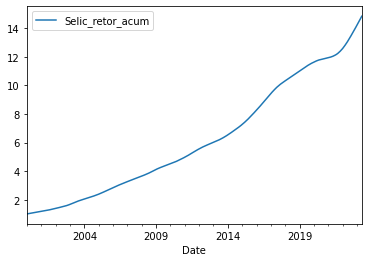

In [39]:
selic_mensal['Selic_retor_acum'] = selic_mensal.Retorno.cumprod()
selic_mensal.Selic_retor_acum.plot(legend=True)

lista_tickers_IBRA = ['IBOV', 'IBRA', 'AALR3', 'ABCB4', 'ABEV3', 'AERI3', 'AESB3', 'AGRO3', 'ALPA4', 'ALSO3', 'ALUP11', 'AMBP3', 'ANIM3', 
                 'ARML3', 'ARZZ3', 'ASAI3', 'AURE3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 'BLAU3', 'BMOB3', 
                 'BOAS3', 'BPAC11', 'BPAN4', 'BRAP4', 'BRFS3', 'BRKM5', 'BRPR3', 'BRSR6', 'CAML3', 'CASH3', 'CBAV3', 'CCRO3', 'CEAB3', 
                 'CIEL3', 'CLSA3', 'CMIG3', 'CMIG4', 'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 'CSAN3', 'CSMG3', 'CSNA3', 'CURY3', 
                 'CVCB3', 'CXSE3', 'CYRE3', 'DASA3', 'DIRR3', 'DXCO3', 'ECOR3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENAT3', 'ENBR3', 
                 'ENEV3', 'ENGI11', 'EQTL3', 'ESPA3', 'EVEN3', 'EZTC3', 'FESA4', 'FHER3', 'FLRY3', 'GFSA3', 'GGBR4', 'GGPS3', 'GMAT3', 
                 'GOAU4', 'GOLL4', 'GRND3', 'GUAR3', 'HAPV3', 'HBSA3', 'HYPE3', 'IFCM3', 'IGTI11', 'INTB3', 'IRBR3', 'ITSA4', 'ITUB3', 
                 'ITUB4', 'JALL3', 'JBSS3', 'JHSF3', 'KEPL3', 'KLBN11', 'LAVV3', 'LEVE3', 'LIGT3', 'LJQQ3', 'LOGG3', 'LOGN3', 'LREN3', 
                 'LWSA3', 'MATD3', 'MDIA3', 'MEAL3', 'MEGA3', 'MGLU3', 'MILS3', 'MLAS3', 'MODL3', 'MOVI3', 'MRFG3', 'MRVE3', 'MULT3', 
                 'MYPK3', 'NEOE3', 'NTCO3', 'ODPV3', 'ONCO3', 'ORVR3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PGMN3', 'PNVL3', 'POMO4', 
                 'POSI3', 'PRIO3', 'PSSA3', 'PTBL3', 'QUAL3', 'RADL3', 'RAIL3', 'RAIZ4', 'RANI3', 'RAPT4', 'RDOR3', 'RECV3', 'RENT3', 
                 'ROMI3', 'RRRP3', 'SANB11', 'SAPR11', 'SBFG3', 'SBSP3', 'SEER3', 'SEQL3', 'SIMH3', 'SLCE3', 'SMFT3', 'SMTO3', 'SOMA3', 
                 'SQIA3', 'STBP3', 'SUZB3', 'TAEE11', 'TASA4', 'TEND3', 'TIMS3', 'TOTS3', 'TRAD3', 'TRIS3', 'TRPL4', 'TTEN3', 'TUPY3', 
                 'UGPA3', 'UNIP6', 'USIM5', 'VALE3', 'VAMO3', 'VBBR3', 'VIIA3', 'VIVA3', 'VIVT3', 'VULC3', 'WEGE3', 'WIZC3', 'YDUQ3', 
                 'ZAMP3']

In [5]:
lista_tickers_IBOV = ['IBOV', 'ABEV3', 'ALPA4', 'ALSO3', 'ARZZ3', 'ASAI3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3', 
                      'BPAC11', 'BRAP4', 'BRFS3', 'BRKM5', 'CASH3', 'CCRO3', 'CIEL3', 'CMIG4', 'CMIN3', 'COGN3', 'CPFE3', 'CPLE6', 'CRFB3', 
                      'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'DXCO3', 'EGIE3', 'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3', 
                      'EZTC3', 'FLRY3', 'GGBR4', 'GOAU4', 'GOLL4', 'HAPV3', 'HYPE3', 'IGTI11', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3', 'KLBN11', 
                      'LREN3', 'LWSA3', 'MGLU3', 'MRFG3', 'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PETZ3', 'PRIO3', 'RADL3', 
                      'RAIL3', 'RAIZ4', 'RDOR3', 'RENT3', 'RRRP3', 'SANB11', 'SBSP3', 'SLCE3', 'SMTO3', 'SOMA3', 'SUZB3', 'TAEE11', 'TIMS3', 
                      'TOTS3', 'UGPA3', 'USIM5', 'VALE3', 'VBBR3', 'VIIA3', 'VIVT3', 'WEGE3', 'YDUQ3']


In [7]:
dados_ohlc_mensais = []

for ticker in lista_tickers_IBOV:

    dados_ohlc_ativo = TvDatafeed().get_hist(symbol=ticker, exchange='BMFBOVESPA', interval=Interval.in_monthly, n_bars=10000)
    dados_ohlc_ativo['symbol'] = dados_ohlc_ativo['symbol'].str.replace('BMFBOVESPA:', '')
    dados_ohlc_ativo['retorno'] = pd.DataFrame((1 + dados_ohlc_ativo.close.pct_change()))
    dados_ohlc_ativo = dados_ohlc_ativo.loc['2000':]
    dados_ohlc_ativo['Ano_mes'] = dados_ohlc_ativo.index.strftime('%Y-%m')
    dados_ohlc_mensais.append(dados_ohlc_ativo)

you are using nologin method, data you access may be limited


In [12]:
ano_inicio = '2003'

ls_merge_cdi_ativo = []

for df in dados_ohlc_mensais:
    merge_cdi_ativo = pd.merge(df, selic_mensal, on='Ano_mes', how='left')
    merge_cdi_ativo.index = df.index
    merge_cdi_ativo['Ano'] = merge_cdi_ativo.index.strftime('%Y')
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index>=ano_inicio]
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index<'2023']
    merge_cdi_ativo['CDI_cumprod'] = merge_cdi_ativo.CDI_mensal.cumprod()
    merge_cdi_ativo[str(df.symbol[0])+'_retorno_acc'] = merge_cdi_ativo.retorno.cumprod()
    ls_merge_cdi_ativo.append(merge_cdi_ativo)


dict_razao = {'ativo':[], 'razao':[], 'data_inicio':[]}

for i in ls_merge_cdi_ativo:
    razao = i.iloc[-1,-1] / i.CDI_cumprod[-1]
    dict_razao['ativo'].append(i.symbol[0])
    dict_razao['razao'].append(razao)
    dict_razao['data_inicio'].append(i.index[0])

result_final = pd.DataFrame(dict_razao)
result_final.describe()

,razao
count,87.000000
mean,15.146686
std,66.712999
min,0.006267
25%,0.589050
50%,1.259172
75%,3.510108
max,541.863997


In [13]:
ano_inicio = '2013'

ls_merge_cdi_ativo = []

for df in dados_ohlc_mensais:
    merge_cdi_ativo = pd.merge(df, selic_mensal, on='Ano_mes', how='left')
    merge_cdi_ativo.index = df.index
    merge_cdi_ativo['Ano'] = merge_cdi_ativo.index.strftime('%Y')
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index>=ano_inicio]
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index<'2023']
    merge_cdi_ativo['CDI_cumprod'] = merge_cdi_ativo.CDI_mensal.cumprod()
    merge_cdi_ativo[str(df.symbol[0])+'_retorno_acc'] = merge_cdi_ativo.retorno.cumprod()
    ls_merge_cdi_ativo.append(merge_cdi_ativo)


dict_razao = {'ativo':[], 'razao':[], 'data_inicio':[]}

for i in ls_merge_cdi_ativo:
    razao = i.iloc[-1,-1] / i.CDI_cumprod[-1]
    dict_razao['ativo'].append(i.symbol[0])
    dict_razao['razao'].append(razao)
    dict_razao['data_inicio'].append(i.index[0])

result_final = pd.DataFrame(dict_razao)
result_final.describe()

,razao
count,87.000000
mean,1.093949
std,0.899219
min,0.032195
25%,0.471641
50%,0.841027
75%,1.342162
max,4.128587


In [14]:
ano_inicio = '2018'

ls_merge_cdi_ativo = []

for df in dados_ohlc_mensais:
    merge_cdi_ativo = pd.merge(df, selic_mensal, on='Ano_mes', how='left')
    merge_cdi_ativo.index = df.index
    merge_cdi_ativo['Ano'] = merge_cdi_ativo.index.strftime('%Y')
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index>=ano_inicio]
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index<'2023']
    merge_cdi_ativo['CDI_cumprod'] = merge_cdi_ativo.CDI_mensal.cumprod()
    merge_cdi_ativo[str(df.symbol[0])+'_retorno_acc'] = merge_cdi_ativo.retorno.cumprod()
    ls_merge_cdi_ativo.append(merge_cdi_ativo)


dict_razao = {'ativo':[], 'razao':[], 'data_inicio':[]}

for i in ls_merge_cdi_ativo:
    razao = i.iloc[-1,-1] / i.CDI_cumprod[-1]
    dict_razao['ativo'].append(i.symbol[0])
    dict_razao['razao'].append(razao)
    dict_razao['data_inicio'].append(i.index[0])

result_final = pd.DataFrame(dict_razao)
result_final.describe()

,razao
count,87.000000
mean,1.343791
std,1.854561
min,0.076554
25%,0.590248
50%,0.990377
75%,1.542737
max,16.695433


In [15]:
ano_inicio = '2022'

ls_merge_cdi_ativo = []

for df in dados_ohlc_mensais:
    merge_cdi_ativo = pd.merge(df, selic_mensal, on='Ano_mes', how='left')
    df = df[df.index>'2000']
    merge_cdi_ativo.index = df.index
    merge_cdi_ativo['Ano'] = merge_cdi_ativo.index.strftime('%Y')
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index>=ano_inicio]
    merge_cdi_ativo = merge_cdi_ativo[merge_cdi_ativo.index<'2023']
    merge_cdi_ativo['CDI_cumprod'] = merge_cdi_ativo.CDI_mensal.cumprod()
    merge_cdi_ativo[str(df.symbol[0])+'_retorno_acc'] = merge_cdi_ativo.retorno.cumprod()
    ls_merge_cdi_ativo.append(merge_cdi_ativo)


dict_razao = {'ativo':[], 'razao':[], 'data_inicio':[]}

for i in ls_merge_cdi_ativo:
    razao = i.iloc[-1,-1] / i.CDI_cumprod[-1]
    dict_razao['ativo'].append(i.symbol[0])
    dict_razao['razao'].append(razao)
    dict_razao['data_inicio'].append(i.index[0])

result_final = pd.DataFrame(dict_razao)
result_final.describe()

,razao
count,87.000000
mean,0.837076
std,0.343658
min,0.276481
25%,0.591270
50%,0.837767
75%,1.075577
max,2.156961


<AxesSubplot:xlabel='datetime'>

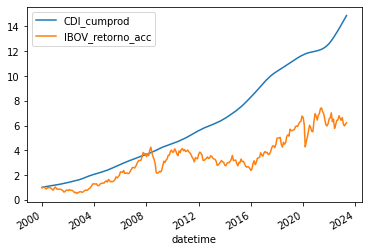

In [69]:
ls_merge_cdi_ativo[0].CDI_cumprod.plot(legend=True)
ls_merge_cdi_ativo[0].iloc[:,-1].plot(legend=True)

<AxesSubplot:xlabel='datetime'>

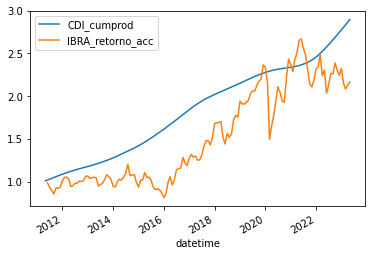

In [71]:
ls_merge_cdi_ativo[1].CDI_cumprod.plot(legend=True)
ls_merge_cdi_ativo[1].iloc[:,-1].plot(legend=True)

In [74]:
ls_merge_cdi_ativo = []

for df in dados_ohlc_mensais:
    merge_cdi_ativo = pd.merge(selic_mensal, df, on='Ano_mes')
    merge_cdi_ativo['CDI_cumprod'] = merge_cdi_ativo.CDI_mensal.cumprod()
    merge_cdi_ativo[str(df.symbol[0])+'_retorno_acc'] = merge_cdi_ativo.retorno.cumprod()
    merge_cdi_ativo.index = df.index
    ls_merge_cdi_ativo.append(merge_cdi_ativo)

In [ ]:
fig_box = go.Figure()

fig_box.add_trace(go.Box(
            y=result_final.monthly[~result_final.monthly.isna()],
            name="Monthly",
            marker_color="red",
            boxpoints="all", boxmean=True))

fig_box.add_trace(go.Box(
            y=result_final.weekly[~result_final.weekly.isna()],
            name="Weekly",
            marker_color="blue",
            boxpoints="all", boxmean=True))

fig_box.add_trace(go.Box(
            y=result_final.daily[~result_final.daily.isna()],
            name="Daily",
            marker_color="green",
            boxpoints="all", boxmean=True))

fig_box.update_layout(title='', xaxis_title="<b>Timeframes",
                yaxis_title="<b>Retorno anualizado %", legend_title="",
                font=dict(family="Arial, Arial, Arial",size=22,color="black"),
                margin=dict(l=50, r=20, t=20, b=20), template = 'ggplot2', paper_bgcolor="#f7f8fa",
                legend=dict(orientation="v",yanchor="bottom",y=0.83,xanchor="right",x=0.20),
                yaxis=dict(range=[-40, 40]),
                width=1000,height=1000)

fig_box.show()

In [78]:
dict_razao = {'ativo':[], 'razao':[], 'data_inicio':[]}

for i in ls_merge_cdi_ativo:
    razao = i.iloc[-1,-1] / i.CDI_cumprod[-1]
    dict_razao['ativo'].append(i.symbol[0])
    dict_razao['razao'].append(razao)
    dict_razao['data_inicio'].append(i.index[0])

In [80]:
df_final = pd.DataFrame(dict_razao)
df_final

,ativo,razao,data_inicio
0,IBOV,0.418136,2000-01-03 09:00:00
1,IBRA,0.748377,2011-05-02 10:00:00
2,AALR3,0.776902,2016-10-03 10:00:00
3,ABCB4,1.054814,2007-09-03 10:00:00
4,ABEV3,3.156925,2000-01-03 09:00:00
...,...,...,...
178,VULC3,0.979377,2000-11-01 09:00:00
179,WEGE3,26.575136,2000-01-03 09:00:00
180,WIZC3,0.388942,2015-06-01 10:00:00
181,YDUQ3,0.416801,2007-07-02 10:00:00


In [86]:
df_final.sort_values('razao').tail(50)

,ativo,razao,data_inicio
84,HYPE3,1.662739,2008-04-01 10:00:00
158,SUZB3,1.783458,2017-11-01 09:00:00
125,PETR4,1.877488,2000-01-03 09:00:00
30,BRFS3,1.896912,2000-01-03 09:00:00
157,STBP3,1.968879,2016-08-01 10:00:00
124,PETR3,1.997728,2000-01-03 09:00:00
98,LEVE3,2.047326,2005-10-03 10:00:00
152,SLCE3,2.356770,2007-06-01 10:00:00
156,SQIA3,2.368507,2013-03-01 10:00:00
29,BRAP4,2.514129,2000-08-01 10:00:00


<AxesSubplot:>

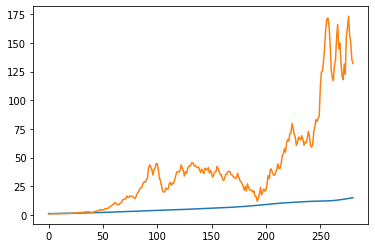

In [93]:
ibov = TvDatafeed().get_hist(symbol='VALE3', exchange='BMFBOVESPA', interval=Interval.in_monthly, n_bars=10000)
ibov = ibov.loc['1999':]
ibov_pct = pd.DataFrame((1 + ibov.close.pct_change()))
ibov_pct = ibov_pct.loc['2000':]
ibov_pct['Ano_mes'] = ibov_pct.index.strftime('%Y-%m')
ibov_pct.columns = ['IBOV', 'Ano_mes']

merge_cdi_ibov = pd.merge(selic_mensal, ibov_pct, on='Ano_mes')
merge_cdi_ibov['CDI_cumprod'] = merge_cdi_ibov.CDI_mensal.cumprod()
merge_cdi_ibov['IBOV_cumprod'] = merge_cdi_ibov.IBOV.cumprod()
merge_cdi_ibov.CDI_cumprod.plot(use_index=True)
merge_cdi_ibov.IBOV_cumprod.plot(use_index=True)